In [1]:
#Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Loading the dataset

In [5]:
df_store=pd.read_excel('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/timeseries/Sample_Superstore.xlsx')

In [6]:
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df_store.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
#We will be predicting future demand for Office Supplies as a part of our analysis.

In [9]:
df_os=df_store[df_store['Category']=='Office Supplies']

In [10]:
df_os.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [11]:
df_os.shape

(6026, 21)

In [12]:
df_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 2 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         6026 non-null   int64         
 1   Order ID       6026 non-null   object        
 2   Order Date     6026 non-null   datetime64[ns]
 3   Ship Date      6026 non-null   datetime64[ns]
 4   Ship Mode      6026 non-null   object        
 5   Customer ID    6026 non-null   object        
 6   Customer Name  6026 non-null   object        
 7   Segment        6026 non-null   object        
 8   Country        6026 non-null   object        
 9   City           6026 non-null   object        
 10  State          6026 non-null   object        
 11  Postal Code    6026 non-null   int64         
 12  Region         6026 non-null   object        
 13  Product ID     6026 non-null   object        
 14  Category       6026 non-null   object        
 15  Sub-Category   6026 n

There are no missing values in the dataset.

In [14]:
df_os['Order Date'].min(),df_os['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Selecting only the required columns for model building.

In [18]:
df_quantity=df_os.loc[:,['Order Date','Quantity']]

In [20]:
df_quantity.columns

Index(['Order Date', 'Quantity'], dtype='object')

In [21]:
df_quantity.columns=['Order_Date','Quantity']

In [22]:
df_quantity=df_quantity.set_index('Order_Date')

In [23]:
df_quantity.head()

,Quantity
Order_Date,
2016-06-12,2
2015-10-11,2
2014-06-09,4
2014-06-09,3
2014-06-09,5


In [24]:
#Resampling the data to show the month start value

In [37]:
df_monthly_quantity=df_quantity.resample('MS').sum()

In [38]:
df_monthly_quantity.head()

,Quantity
Order_Date,
2014-01-01,169
2014-02-01,103
2014-03-01,370
2014-04-01,345
2014-05-01,281


In [31]:
#viewing the time series data

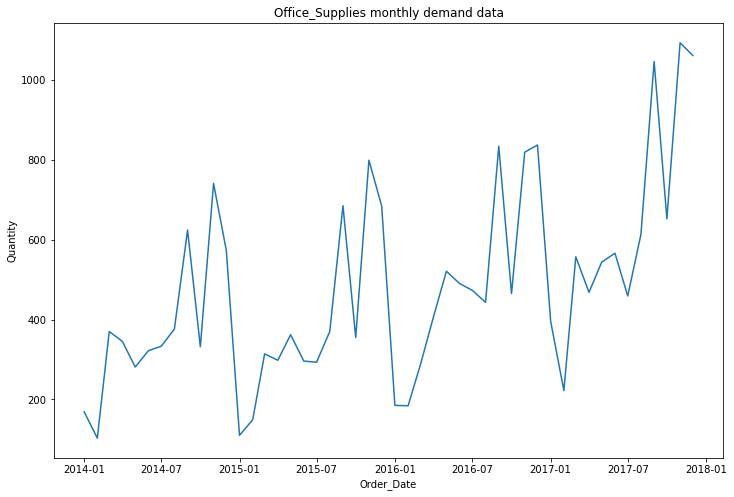

In [39]:
plt.figure(figsize=(12,8))
plt.plot(df_monthly_quantity['Quantity'])
plt.title('Office_Supplies monthly demand data')
plt.xlabel('Order_Date')
plt.ylabel('Quantity')
plt.show()

In [34]:
#test for stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller,kpss

In [36]:
#ADFuller Test
#H0=non-stationary
#H1=stationary

In [43]:
res=adfuller(df_monthly_quantity,autolag='AIC')
print('ADF statistic: %f'%res[0])
print('p-value: %f'%res[1])
print('Critical values:')
for key,value in res[4].items():
    print('\t%s: %.3f'%(key,value))

ADF statistic: -3.598622
p-value: 0.005787
Critical values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [41]:
#KPSS test
#H0=stationary
#H1=non-stationary

In [46]:
kpss_res=kpss(df_monthly_quantity,nlags='auto')

In [47]:
kpss_res[1]

0.01

In [48]:
kpss_res[0]

0.7624837353355493

The p value is less than 0.05, so we will reject the null hypothesis that the data is stationary. Hence, the data is not stationary.

In [49]:
#decomposing the timeseries

In [51]:
import statsmodels.api as sm
from pylab import rcParams

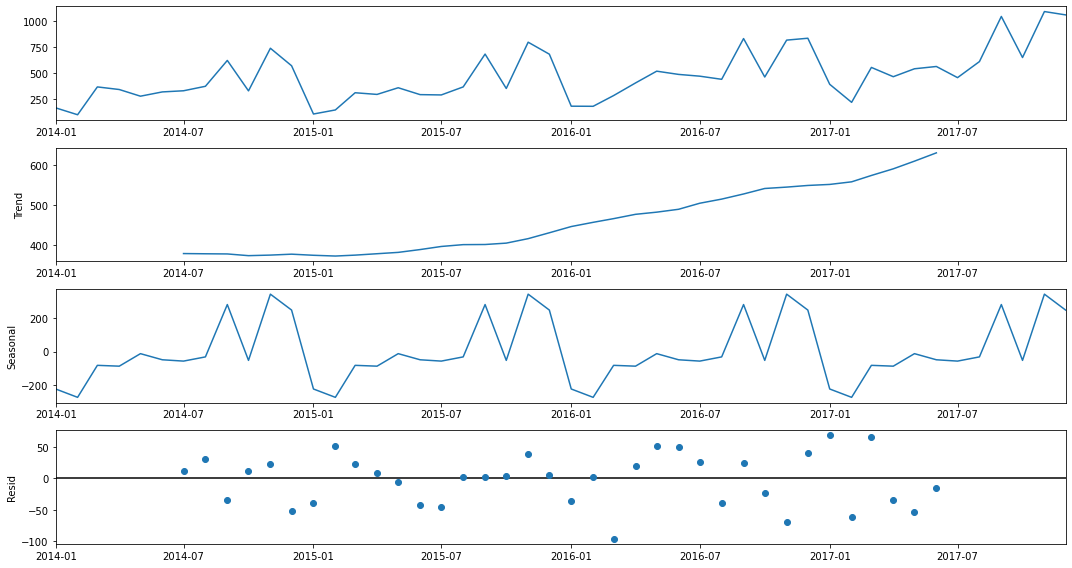

In [54]:
rcParams['figure.figsize']=15,8
decomposition=sm.tsa.seasonal_decompose(df_monthly_quantity,model='additive')
decomposition.plot()
plt.show()

In [55]:
#forecasting the model

In [56]:
import itertools

In [96]:
p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [97]:
for i in range(len(pdq)):
    print('SARIMAX: {} x {}'.format(pdq[i],seasonal_pdq[i]))

SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 2) x (0, 0, 2, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 2) x (0, 1, 2, 12)
SARIMAX: (0, 2, 0) x (0, 2, 0, 12)
SARIMAX: (0, 2, 1) x (0, 2, 1, 12)
SARIMAX: (0, 2, 2) x (0, 2, 2, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)
SARIMAX: (1, 0, 2) x (1, 0, 2, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 2, 0) x (1, 2, 0, 12)
SARIMAX: (1, 2, 1) x (1, 2, 1, 12)
SARIMAX: (1, 2, 2) x (1, 2, 2, 12)
SARIMAX: (2, 0, 0) x (2, 0, 0, 12)
SARIMAX: (2, 0, 1) x (2, 0, 1, 12)
SARIMAX: (2, 0, 2) x (2, 0, 2, 12)
SARIMAX: (2, 1, 0) x (2, 1, 0, 12)
SARIMAX: (2, 1, 1) x (2, 1, 1, 12)
SARIMAX: (2, 1, 2) x (2, 1, 2, 12)
SARIMAX: (2, 2, 0) x (2, 2, 0, 12)
SARIMAX: (2, 2, 1) x (2, 2, 1, 12)
SARIMAX: (2, 2, 2) x (2, 2, 2, 12)


In [98]:
#Model Building

In [99]:
aic_scores={}
i=1

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(df_monthly_quantity,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=model.fit()
            print('ARIMA: {} x {}12.AIC: {}'.format(i,param,param_seasonal,results.aic))
            aic_scores[i]=results.aic
            i+=1
        except:
            continue

ARIMA: 1 x (0, 0, 0)12.AIC: (0, 0, 0, 12)
ARIMA: 2 x (0, 0, 0)12.AIC: (0, 0, 1, 12)
ARIMA: 3 x (0, 0, 0)12.AIC: (0, 0, 2, 12)
ARIMA: 4 x (0, 0, 0)12.AIC: (0, 1, 0, 12)
ARIMA: 5 x (0, 0, 0)12.AIC: (0, 1, 1, 12)
ARIMA: 6 x (0, 0, 0)12.AIC: (0, 1, 2, 12)
ARIMA: 7 x (0, 0, 0)12.AIC: (0, 2, 0, 12)
ARIMA: 8 x (0, 0, 0)12.AIC: (0, 2, 1, 12)
ARIMA: 9 x (0, 0, 0)12.AIC: (0, 2, 2, 12)
ARIMA: 10 x (0, 0, 0)12.AIC: (1, 0, 0, 12)
ARIMA: 11 x (0, 0, 0)12.AIC: (1, 0, 1, 12)
ARIMA: 12 x (0, 0, 0)12.AIC: (1, 0, 2, 12)
ARIMA: 13 x (0, 0, 0)12.AIC: (1, 1, 0, 12)
ARIMA: 14 x (0, 0, 0)12.AIC: (1, 1, 1, 12)
ARIMA: 15 x (0, 0, 0)12.AIC: (1, 1, 2, 12)
ARIMA: 16 x (0, 0, 0)12.AIC: (1, 2, 0, 12)
ARIMA: 17 x (0, 0, 0)12.AIC: (1, 2, 1, 12)
ARIMA: 18 x (0, 0, 0)12.AIC: (1, 2, 2, 12)
ARIMA: 19 x (0, 0, 0)12.AIC: (2, 0, 0, 12)
ARIMA: 20 x (0, 0, 0)12.AIC: (2, 0, 1, 12)
ARIMA: 21 x (0, 0, 0)12.AIC: (2, 0, 2, 12)
ARIMA: 22 x (0, 0, 0)12.AIC: (2, 1, 0, 12)
ARIMA: 23 x (0, 0, 0)12.AIC: (2, 1, 1, 12)
ARIMA: 24 x (0, 0, 0

ARIMA: 191 x (0, 2, 1)12.AIC: (0, 0, 1, 12)
ARIMA: 192 x (0, 2, 1)12.AIC: (0, 0, 2, 12)
ARIMA: 193 x (0, 2, 1)12.AIC: (0, 1, 0, 12)
ARIMA: 194 x (0, 2, 1)12.AIC: (0, 1, 1, 12)
ARIMA: 195 x (0, 2, 1)12.AIC: (0, 1, 2, 12)
ARIMA: 196 x (0, 2, 1)12.AIC: (0, 2, 0, 12)
ARIMA: 197 x (0, 2, 1)12.AIC: (0, 2, 1, 12)
ARIMA: 198 x (0, 2, 1)12.AIC: (0, 2, 2, 12)
ARIMA: 199 x (0, 2, 1)12.AIC: (1, 0, 0, 12)
ARIMA: 200 x (0, 2, 1)12.AIC: (1, 0, 1, 12)
ARIMA: 201 x (0, 2, 1)12.AIC: (1, 0, 2, 12)
ARIMA: 202 x (0, 2, 1)12.AIC: (1, 1, 0, 12)
ARIMA: 203 x (0, 2, 1)12.AIC: (1, 1, 1, 12)
ARIMA: 204 x (0, 2, 1)12.AIC: (1, 1, 2, 12)
ARIMA: 205 x (0, 2, 1)12.AIC: (1, 2, 0, 12)
ARIMA: 206 x (0, 2, 1)12.AIC: (1, 2, 1, 12)
ARIMA: 207 x (0, 2, 1)12.AIC: (1, 2, 2, 12)
ARIMA: 208 x (0, 2, 1)12.AIC: (2, 0, 0, 12)
ARIMA: 209 x (0, 2, 1)12.AIC: (2, 0, 1, 12)
ARIMA: 210 x (0, 2, 1)12.AIC: (2, 0, 2, 12)
ARIMA: 211 x (0, 2, 1)12.AIC: (2, 1, 0, 12)
ARIMA: 212 x (0, 2, 1)12.AIC: (2, 1, 1, 12)
ARIMA: 213 x (0, 2, 1)12.AIC: (2

ARIMA: 379 x (1, 1, 2)12.AIC: (0, 0, 0, 12)
ARIMA: 380 x (1, 1, 2)12.AIC: (0, 0, 1, 12)
ARIMA: 381 x (1, 1, 2)12.AIC: (0, 0, 2, 12)
ARIMA: 382 x (1, 1, 2)12.AIC: (0, 1, 0, 12)
ARIMA: 383 x (1, 1, 2)12.AIC: (0, 1, 1, 12)
ARIMA: 384 x (1, 1, 2)12.AIC: (0, 1, 2, 12)
ARIMA: 385 x (1, 1, 2)12.AIC: (0, 2, 0, 12)
ARIMA: 386 x (1, 1, 2)12.AIC: (0, 2, 1, 12)
ARIMA: 387 x (1, 1, 2)12.AIC: (0, 2, 2, 12)
ARIMA: 388 x (1, 1, 2)12.AIC: (1, 0, 0, 12)
ARIMA: 389 x (1, 1, 2)12.AIC: (1, 0, 1, 12)
ARIMA: 390 x (1, 1, 2)12.AIC: (1, 0, 2, 12)
ARIMA: 391 x (1, 1, 2)12.AIC: (1, 1, 0, 12)
ARIMA: 392 x (1, 1, 2)12.AIC: (1, 1, 1, 12)
ARIMA: 393 x (1, 1, 2)12.AIC: (1, 1, 2, 12)
ARIMA: 394 x (1, 1, 2)12.AIC: (1, 2, 0, 12)
ARIMA: 395 x (1, 1, 2)12.AIC: (1, 2, 1, 12)
ARIMA: 396 x (1, 1, 2)12.AIC: (1, 2, 2, 12)
ARIMA: 397 x (1, 1, 2)12.AIC: (2, 0, 0, 12)
ARIMA: 398 x (1, 1, 2)12.AIC: (2, 0, 1, 12)
ARIMA: 399 x (1, 1, 2)12.AIC: (2, 0, 2, 12)
ARIMA: 400 x (1, 1, 2)12.AIC: (2, 1, 0, 12)
ARIMA: 401 x (1, 1, 2)12.AIC: (2

ARIMA: 567 x (2, 0, 2)12.AIC: (2, 2, 2, 12)
ARIMA: 568 x (2, 1, 0)12.AIC: (0, 0, 0, 12)
ARIMA: 569 x (2, 1, 0)12.AIC: (0, 0, 1, 12)
ARIMA: 570 x (2, 1, 0)12.AIC: (0, 0, 2, 12)
ARIMA: 571 x (2, 1, 0)12.AIC: (0, 1, 0, 12)
ARIMA: 572 x (2, 1, 0)12.AIC: (0, 1, 1, 12)
ARIMA: 573 x (2, 1, 0)12.AIC: (0, 1, 2, 12)
ARIMA: 574 x (2, 1, 0)12.AIC: (0, 2, 0, 12)
ARIMA: 575 x (2, 1, 0)12.AIC: (0, 2, 1, 12)
ARIMA: 576 x (2, 1, 0)12.AIC: (0, 2, 2, 12)
ARIMA: 577 x (2, 1, 0)12.AIC: (1, 0, 0, 12)
ARIMA: 578 x (2, 1, 0)12.AIC: (1, 0, 1, 12)
ARIMA: 579 x (2, 1, 0)12.AIC: (1, 0, 2, 12)
ARIMA: 580 x (2, 1, 0)12.AIC: (1, 1, 0, 12)
ARIMA: 581 x (2, 1, 0)12.AIC: (1, 1, 1, 12)
ARIMA: 582 x (2, 1, 0)12.AIC: (1, 1, 2, 12)
ARIMA: 583 x (2, 1, 0)12.AIC: (1, 2, 0, 12)
ARIMA: 584 x (2, 1, 0)12.AIC: (1, 2, 1, 12)
ARIMA: 585 x (2, 1, 0)12.AIC: (1, 2, 2, 12)
ARIMA: 586 x (2, 1, 0)12.AIC: (2, 0, 0, 12)
ARIMA: 587 x (2, 1, 0)12.AIC: (2, 0, 1, 12)
ARIMA: 588 x (2, 1, 0)12.AIC: (2, 0, 2, 12)
ARIMA: 589 x (2, 1, 0)12.AIC: (2

In [100]:
#finding the key for lowest aic score

In [101]:
min(aic_scores.values())

6.0

In [102]:
min(aic_scores,key=aic_scores.get)

9

We will rebuild the model using pdq=(0,0,0) and seasonal_pdq=(0,2,2,12)

In [103]:
final_model=sm.tsa.statespace.SARIMAX(df_monthly_quantity,
                                           order=(0,0,0),
                                           seasonal_order=(0,2,2,12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
final_result=final_model.fit()

In [104]:
#predicting the result

In [105]:
pred=final_result.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)

In [106]:
pred.predicted_mean

Order_Date
2017-01-01    260.0
2017-02-01    219.0
2017-03-01    260.0
2017-04-01    518.0
2017-05-01    680.0
2017-06-01    684.0
2017-07-01    653.0
2017-08-01    516.0
2017-09-01    983.0
2017-10-01    575.0
2017-11-01    839.0
2017-12-01    990.0
Freq: MS, Name: predicted_mean, dtype: float64

            lower Quantity  upper Quantity
Order_Date                                
2017-01-01       37.679121      482.320879
2017-02-01       -3.320879      441.320879
2017-03-01       37.679121      482.320879
2017-04-01      295.679121      740.320879
2017-05-01      457.679121      902.320879
2017-06-01      461.679121      906.320879
2017-07-01      430.679121      875.320879
2017-08-01      293.679121      738.320879
2017-09-01      760.679121     1205.320879
2017-10-01      352.679121      797.320879
2017-11-01      616.679121     1061.320879
2017-12-01      767.679121     1212.320879


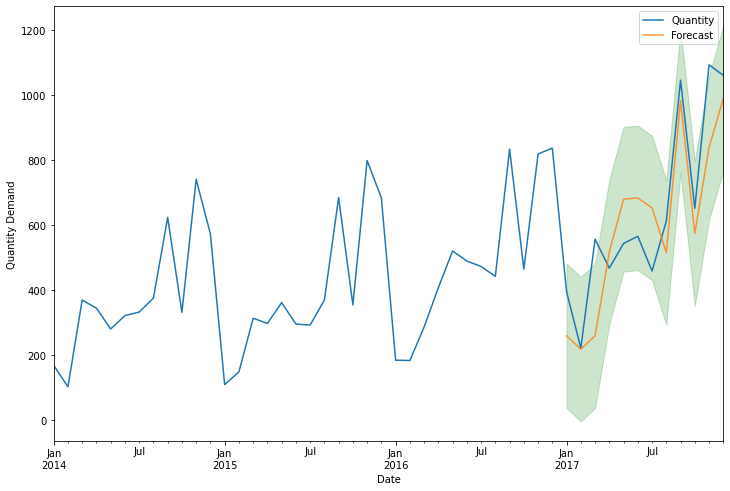

In [107]:
pred_ci=pred.conf_int()
print(pred_ci)

ax=df_monthly_quantity['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Forecast',alpha=.8,figsize=(12,8))
ax.fill_between(pred_ci.index,
               pred_ci['lower Quantity'],
               pred_ci['upper Quantity'],color='green',alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Quantity Demand')

plt.legend()
plt.show()

In [108]:
#predicting for future timeframe

In [109]:
future_pred=final_result.get_prediction(start=pd.to_datetime('2018-01-01'),end=pd.to_datetime('2018-12-01'),dynamic=False)

In [110]:
future_pred

In [111]:
future_pred.predicted_mean

2018-01-01     605.0
2018-02-01     260.0
2018-03-01     827.0
2018-04-01     528.0
2018-05-01     567.0
2018-06-01     642.0
2018-07-01     445.0
2018-08-01     783.0
2018-09-01    1258.0
2018-10-01     839.0
2018-11-01    1367.0
2018-12-01    1285.0
Freq: MS, Name: predicted_mean, dtype: float64

In [112]:
future_pred_ci=future_pred.conf_int()
print(future_pred_ci)

            lower Quantity  upper Quantity
2018-01-01      382.679121      827.320879
2018-02-01       37.679121      482.320879
2018-03-01      604.679121     1049.320879
2018-04-01      305.679121      750.320879
2018-05-01      344.679121      789.320879
2018-06-01      419.679121      864.320879
2018-07-01      222.679121      667.320879
2018-08-01      560.679121     1005.320879
2018-09-01     1035.679121     1480.320879
2018-10-01      616.679121     1061.320879
2018-11-01     1144.679121     1589.320879
2018-12-01     1062.679121     1507.320879


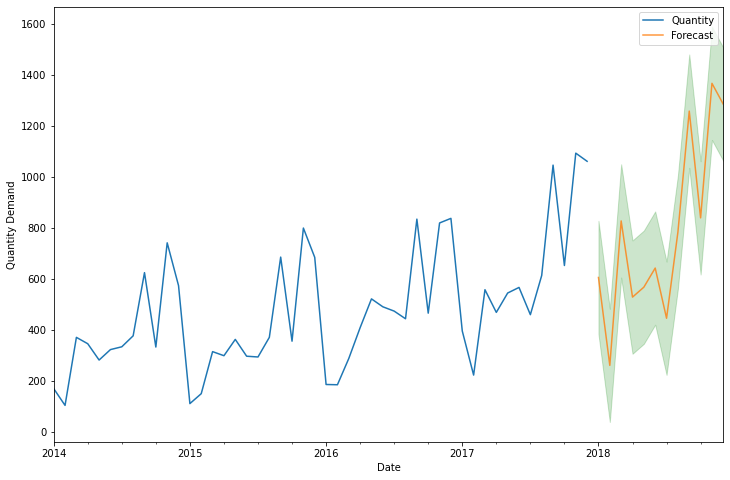

In [113]:
ax=df_monthly_quantity['2014':].plot(label='observed')
future_pred.predicted_mean.plot(ax=ax,label='Forecast',alpha=.8,figsize=(12,8))
ax.fill_between(future_pred_ci.index,
               future_pred_ci['lower Quantity'],
               future_pred_ci['upper Quantity'],color='green',alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Quantity Demand')

plt.legend()
plt.show()

In [124]:
#Calculating RMSE

In [163]:
y_actual=df_monthly_quantity['2017':].values.reshape(1,-1)

In [164]:
y_actual

array([[ 395,  222,  557,  468,  544,  566,  459,  613, 1046,  652, 1093,
        1061]], dtype=int64)

In [157]:
y_pred=pred.predicted_mean.values

In [159]:
y_pred

array([260., 219., 260., 518., 680., 684., 653., 516., 983., 575., 839.,
       990.])

In [166]:
y_actual-y_pred

array([[ 135.,    3.,  297.,  -50., -136., -118., -194.,   97.,   63.,
          77.,  254.,   71.]])

In [170]:
mse=((y_actual-y_pred)**2).mean().round(2)

In [171]:
rmse=np.sqrt(mse).round(2)

In [172]:
print('MSE: {}, RMSE: {}'.format(mse,rmse))

MSE: 22321.92, RMSE: 149.41
